In [ ]:
import tensorflow as tf

x = tf.ones(shape=(2,1))
#print(x)

x = tf.random.normal(shape=(3,1), mean=0., stddev=0.1)
#print(x)

x = tf.random.uniform(shape=(3,1), minval=0.3, maxval=0.9)
#print(x)

# x[0, 0, 0] = 1 we can not make an assignment to numpy array
# We need to use variable
x = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(x)
x.assign(tf.ones(shape=(3,1)))
print(x)
x[0,0].assign(3.)
print(x)

# e *= d   --->   multiply two tensor elementwise

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.096629  ],
       [-0.90169716],
       [-1.0789976 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
# A second look at the GradientTape API

# This is one of the difference of TensorFlow from Numpy
# Retrieve the gradient of any differentiable expression with respect to any of its inputs

import tensorflow as tf

input_var = tf.Variable(initial_value=3.)

with tf.GradientTape() as tape:
  function = tf.square(input_var)
gradient=tape.gradient(function, input_var)
#generally used for gradients=tape.gradient(loss, weight)
print(gradient)

# using gradienttape with constant array 
# Why? Because it would be too expensive to preemptively store the information
# required to compute gradient of anything with respect to anything
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  function=tf.square(input_const)
gradient = tape.gradient(function, input_const)

# To avoid wasting time on it tape needs to know which value to be watched.
# Competable to calculate second order gradients

time = tf.Variable(0.1)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2        # function
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)


tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


(2000, 2)


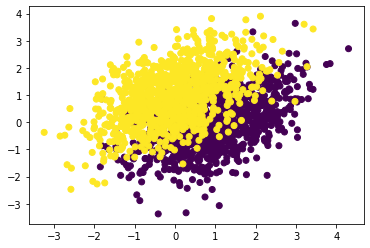

Loss at step 0: 1.6441
Loss at step 1: 0.7525
Loss at step 2: 0.4337
Loss at step 3: 0.3007
Loss at step 4: 0.2349
Loss at step 5: 0.1972
Loss at step 6: 0.1737
Loss at step 7: 0.1581
Loss at step 8: 0.1476
Loss at step 9: 0.1404
Loss at step 10: 0.1353
Loss at step 11: 0.1317
Loss at step 12: 0.1292
Loss at step 13: 0.1274
Loss at step 14: 0.1261
Loss at step 15: 0.1251
Loss at step 16: 0.1245
Loss at step 17: 0.1240
Loss at step 18: 0.1236
Loss at step 19: 0.1233


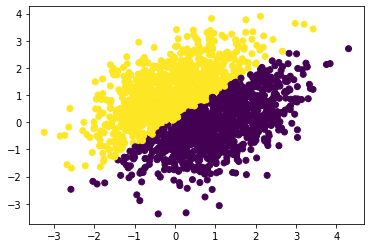

In [ ]:
# implement a linear classifier from scratch in TensorFlow
# First implement a nicely linearly-seperable data in 2D plane
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean= [1, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean= [0, 1], cov= [[1, 0.5], [0.5, 1]], size=num_samples_per_class
)

# Stack these two array to a (2000, 2) array shape
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs.shape)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.random.uniform(shape=(output_dim, )))

def model(inputs):
  return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)  #Forward pass
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) #retrieve grad
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate) # update W and b
  return loss

# For simplicity we will use batch training instead of mini-batch training
for step in range(20):
  loss = training_step(inputs, targets)
  print('Loss at step %d: %.4f' % (step, loss))

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()